# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/jeff/Documents/DS5030/ds5030submissions/data/nhanes_data_17_18.csv')

#print(data.head(10))
data.head(5)

meta = pd.read_csv('/Users/jeff/Documents/DS5030/ds5030submissions/data/nhanes_meta_17_18.csv')
# meta.head(10)

/var/folders/dv/rwkhhnhs4c9frqn6rc7njm6h0000gn/T/ipykernel_47255/3690982801.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/jeff/Documents/DS5030/ds5030submissions/data/nhanes_data_17_18.csv')


In [3]:
# Variables of Choice

# Education Level: DMDEDUC3, EducationLevelChildrenyouth619
# Race: RIDRETH1, RacehispanicOrigin

vars = ['EducationLevelChildrenyouth619', 'RacehispanicOrigin'] 

print(data['EducationLevelChildrenyouth619'].isnull().sum()) # missing values
print(data['RacehispanicOrigin'].isnull().sum()) # missing values

6199
0


In [4]:
pd.crosstab(data['RacehispanicOrigin'], data['EducationLevelChildrenyouth619'])

EducationLevelChildrenyouth619,10th grade,11th grade,12th grade no diploma,1st grade,2nd grade,3rd grade,4th grade,5th grade,6th grade,7th grade,8th grade,9th grade,GED or equivalent,High school graduate,Less than 9th grade,More than high school,Never attended / kindergarten only
RacehispanicOrigin,,,,,,,,,,,,,,,,,
Mexican American,26,29,2,31,31,36,33,37,27,26,27,19,0,26,1,17,28
Non-Hispanic Black,27,31,6,33,47,55,32,50,38,36,42,35,0,23,0,12,35
Non-Hispanic White,37,44,4,54,51,51,46,48,46,40,42,46,5,50,6,21,56
Other Hispanic,13,6,0,12,20,16,18,14,14,11,10,10,0,10,2,5,14
Other Race - Including Multi-Racial,31,39,6,35,40,35,39,25,22,32,28,34,0,31,2,12,36


Looking at the contingency table, there definitely seems to be some disparities among race across the education levels. White students make up the majority of both high school graduates and more than high schoool education relative to other races. Furthermore, there seems to be more presentation from Non-Hispanic Blacks and Mexican Americans in earlier education levels before tapering off into the high school years. Other than that, it is hard to deduce any significant patterns as there are too many buckets across the years, which makes the individual counts and hard to interpret. Given the large number of missing values, which we calculated earlier, it would be unreasonable to make any conclusions beyond what we can see. 

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [5]:
# Race: RacehispanicOrigin
# BMI: BodyMassIndexKgm2

print(data['BodyMassIndexKgm2'].isnull().sum()) # missing values
print(data['RacehispanicOrigin'].isnull().sum()) # missing values 

data2 = data[['BodyMassIndexKgm2', 'RacehispanicOrigin']].dropna() # drop them 

descriptiveTable = data2.groupby('RacehispanicOrigin')['BodyMassIndexKgm2'].describe()
print(descriptiveTable)


361
0
                                      count       mean       std   min  \
RacehispanicOrigin                                                       
Mexican American                     1175.0  27.143319  7.748931  13.2   
Non-Hispanic Black                   1868.0  27.647805  9.413543  13.0   
Non-Hispanic White                   2664.0  26.746959  8.406813  12.8   
Other Hispanic                        704.0  26.772301  6.999198  13.2   
Other Race - Including Multi-Racial  1594.0  24.536888  7.013107  12.3   

                                        25%   50%    75%   max  
RacehispanicOrigin                                              
Mexican American                     21.000  27.0  31.95  59.7  
Non-Hispanic Black                   20.400  26.4  33.40  86.2  
Non-Hispanic White                   20.300  25.9  31.70  74.8  
Other Hispanic                       21.775  26.8  31.10  52.0  
Other Race - Including Multi-Racial  19.600  24.0  28.40  72.6  


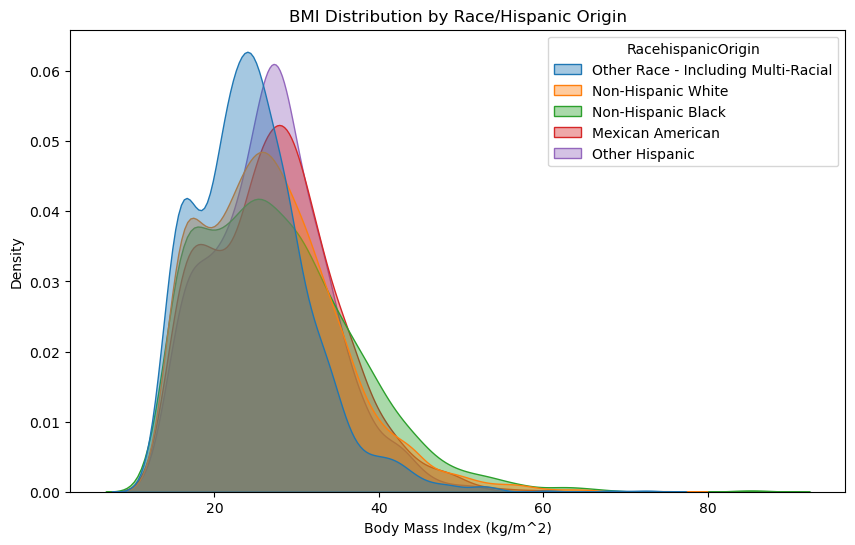

In [8]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data2, x = "BodyMassIndexKgm2", hue = "RacehispanicOrigin", common_norm = False, fill = True, alpha = 0.4)
plt.title("BMI Distribution by Race/Hispanic Origin")
plt.xlabel("Body Mass Index (kg/m^2)")
plt.show()

Looking at the tables and groups kernel density plots, it is clear that groups like Non-Hispanic Black, Mexican American, and Hispanic stick out due to their higher peaks in BMI relative to their races. This can be reflected in the tables, with higher means and medians. In particular for Blacks, the difference in the third quartile reveals how distinct it is from multi-racial individuals and white individuals. Combined, the tables and plots reveal similar trends across races based on BMI, revealing the differences in distributions clearly outlined by race. Unlike the previous question, there are not as many missing values which we caluculated. As a result, we can see that there are varying distributions across race, especially as we normalize based on counts to see specifically within each race what the distribution looks like, rather than being affected by differences in counts, which is relevant in race. 

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

For simplicity purposes, let us ignore the $1/N$ for now, and look at the second grouping, $\sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2$. We will also define the last part as $x: $ $\frac{1}{h}k\left(\frac{z-x_i}{h}\right)$. By first taking the derivative of the function w.r.t $\hat{y}(z)$, we get $ 2 * \sum_{i=1}^N (\hat{y}(z) - y_i) * x = 0$. Solving for $\hat{y}(z)$, we first get $\hat{y}(z) \sum_{i=1}^N x - \sum_{i=1}^N x * y_i = 0$, which can be rewritten as $\hat{y}(z) = \sum_{i=1}^N x * y_i / \sum_{i=1}^N x$. After plugging back in for x, we can rewrite the full equation as $\hat{y}(z) = \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right) * y_i / \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right)$. Finally, adding in the 1 / N from before to both the top and bottom, we arrive at the LCLS/Naradaya-Watson estimator, $\hat{y}(z) = ((1 / N) * \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right) * y_i) / ((1 / N) * \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right))$.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

Text(0, 0.5, 'BodyMassIndexKgm2')

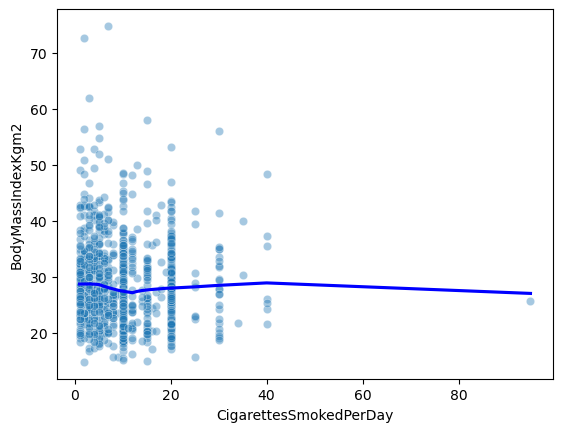

In [10]:
# NHANES DATA

# BMI: BodyMassIndexKgm2
# Cigs Smoked: CigarettesSmokedPerDay

data3 = data[['BodyMassIndexKgm2', 'CigarettesSmokedPerDay']].dropna()

sns.scatterplot(data = data3, x = 'CigarettesSmokedPerDay', y = 'BodyMassIndexKgm2',
                alpha = 0.4)

sns.regplot(data = data3, x = 'CigarettesSmokedPerDay', y = 'BodyMassIndexKgm2',
            lowess = True, scatter = False, color = "blue")

plt.xlabel('CigarettesSmokedPerDay')
plt.ylabel('BodyMassIndexKgm2')

It is very likely that this relationship is not plausibly casual. Based on the plots, this suggests that more cigarettes smoked per day leads to a slight decrease in BMI. Does smoking make people thinner? Likely not. After all, there are significantly other factors that impact BMI, such as socioeconomic status, amount of physical activity, genetics, income, and education that also could contribute to differences in both cigarette count and BMI. Yet with some of these factors, things like diet and stress that can impact BMI are often hard to describe and measure. Looking at the data itself, it is clear that there may inaccuracies in the data, most notably bunching in the data around areas like 20 cigarettes, as well as 10, and most of the more "round numbers". This indicates that we should recognize that when using this data to model or make any interpretations, we should recognize these discrepancies and limitations of the data. Regardless of these concerns, this model can still be used as a predictor of BMI but cannot provide an explantion of BMI. That is, you could predict based on the number of cigarettes smoked what their BMI might be, but cannot deduce that more cigarettes leads to a lower BMI. 